# GROUP ONE: You'll just need to plot, you won't need to join or do much analysis

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

# Make a map of power plants in the US, color coded by type

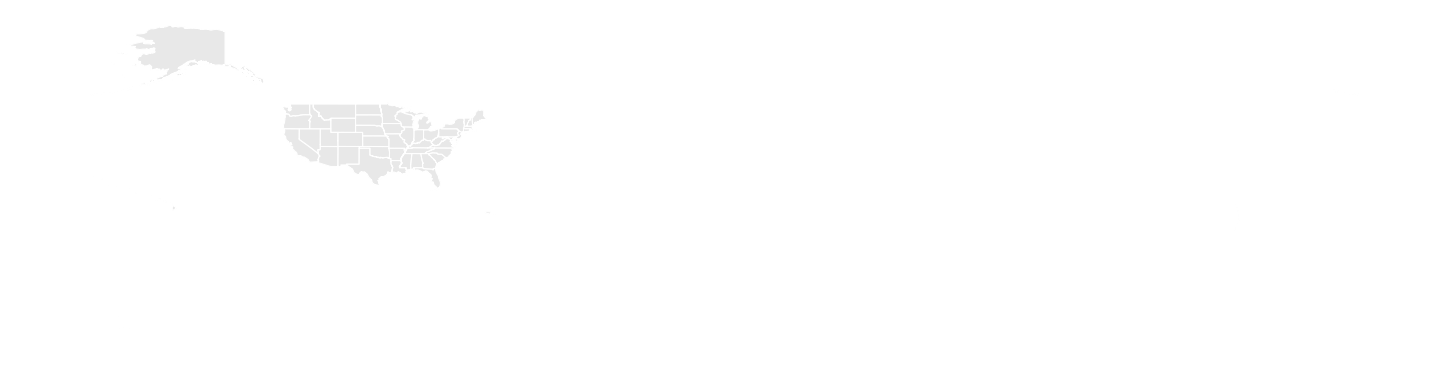

In [32]:
usa = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
#usa = usa.to_crs({'init': 'epsg:5071'})

ax = usa.plot(figsize = (25,30), edgecolor= 'white', color = 'lightgrey').axis('off')

In [31]:
usa.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922788...


In [33]:
usa.crs = {'proj':'latlong'}
usa.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."


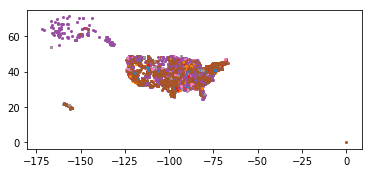

In [5]:
df = pd.read_csv("powerplants.csv")
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplant = gpd.GeoDataFrame(df, geometry=points)
powerplant.crs = {'init': 'epsg:5071'}
powerplant.plot(column = 'sector_nam')

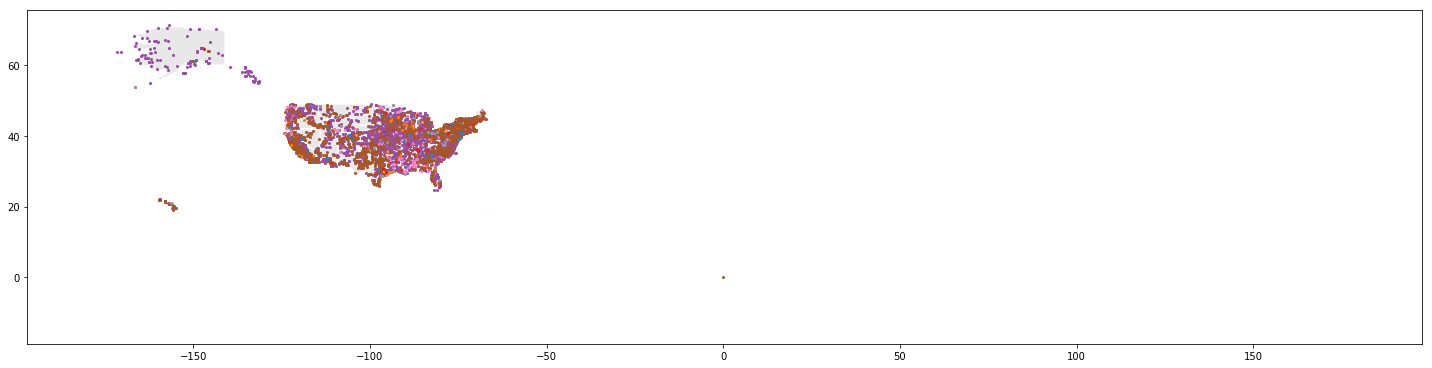

In [6]:
ax = usa.plot(figsize=(25,30),edgecolor= 'white', color = 'lightgrey')
powerplant.plot(ax = ax, column = 'sector_nam')

# Make a map of air quality stations, color coded by worst air quality ever 

In [7]:
df_air = pd.read_csv("pm25_annual_fixed.csv")
points_air = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air_condition = gpd.GeoDataFrame(df_air, geometry=points_air)
air_condition.crs = {'init': 'epsg:5017'}

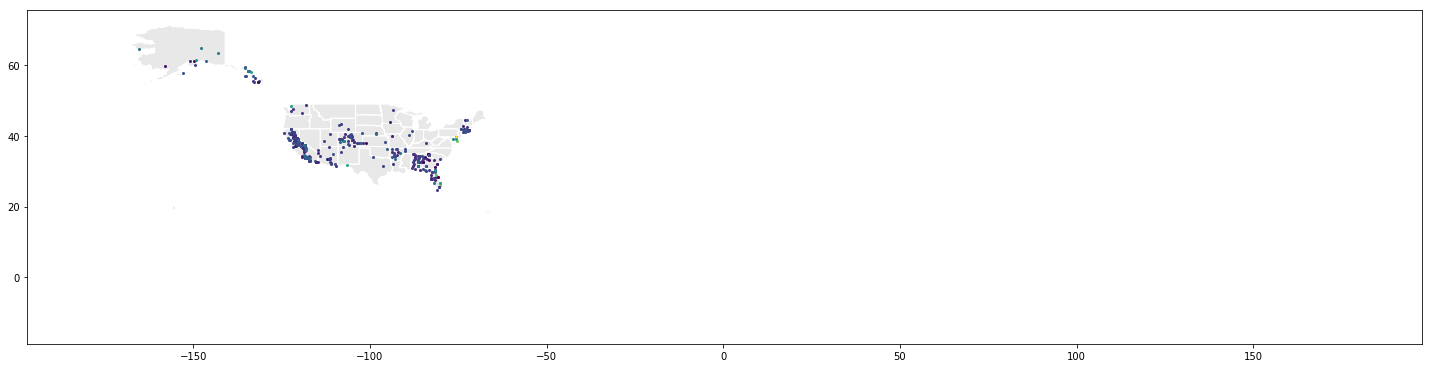

In [8]:
ax = usa.plot(figsize=(25,30),edgecolor= 'white', color = 'lightgrey')
air_condition.plot(ax = ax, column = '1st Max Value')

# Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [9]:
df_nuclear = df[df['Nuclear_MW'] != 0]
points_nuclear = df_nuclear.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
nuclear = gpd.GeoDataFrame(df_nuclear, geometry=points_nuclear)
nuclear.crs = {'init': 'epsg:5071'}

In [10]:
df_nonnuclear = df[df['Nuclear_MW'] == 0]
points_nonnuclear = df_nonnuclear.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
nonnuclear = gpd.GeoDataFrame(df_nonnuclear, geometry=points_nonnuclear)
nonnuclear.crs = {'init': 'epsg:5071'}

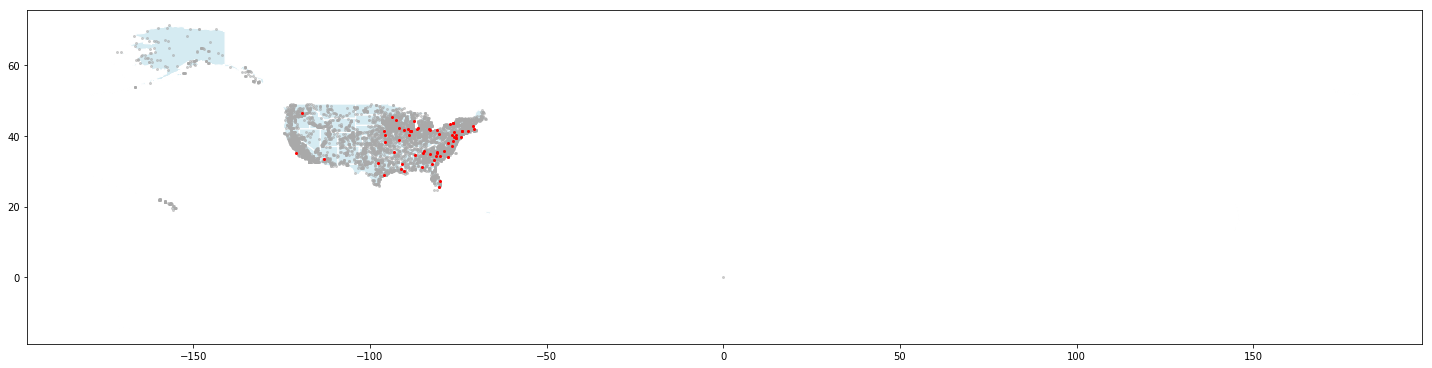

In [11]:
ax = usa.plot(figsize=(25,30),edgecolor= 'white', color = 'lightblue')

nonnuclear.plot(ax = ax, color = 'darkgrey', alpha = 0.5)
nuclear.plot(ax = ax, color = 'red')

# GROUP TWO: For most of these you'll need a spatial join

## Which state produces the most energy from coal?

In [61]:
usa.crs = {'proj':'latlong'}
usa.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."


In [62]:
#spatial join the two geopandas table
p_state = gpd.sjoin(powerplant, usa, how='inner', op='within')
p_state

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
10,14,Logan Martin Dam,Alabama Power Co,195,Electric Utility,Vincent,Talladega,35178,299 Logan Martin Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [63]:
p_state.groupby('NAME')['Coal_MW'].sum().sort_values(ascending = False).head(1)

NAME
Texas    23588.5
Name: Coal_MW, dtype: float64

# Which power plants are in New York?

In [183]:
p_state[p_state['NAME'] =='New York'].head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY


## Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

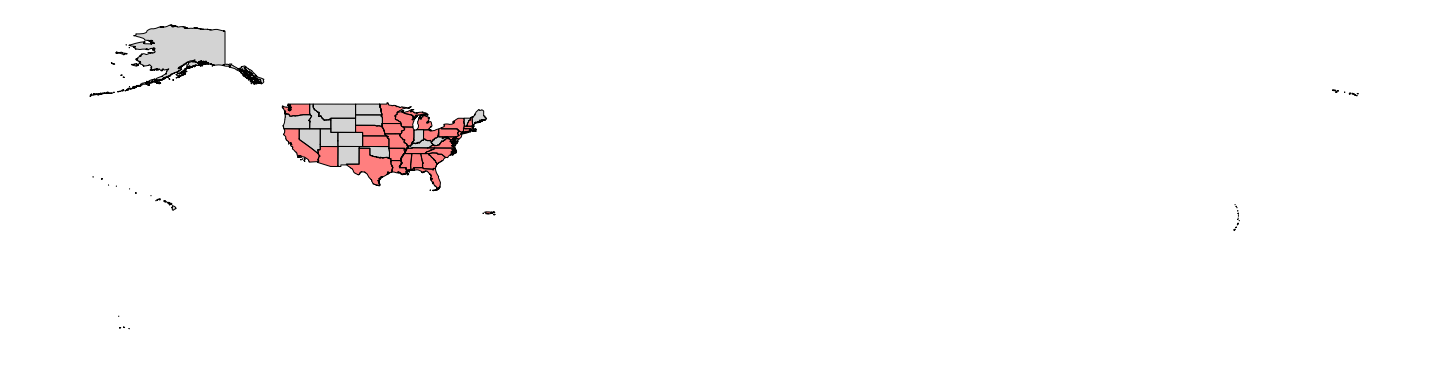

In [182]:
nuclear_total = p_state.groupby('NAME')['Nuclear_MW'].sum().reset_index()
usa_nuclear = usa.merge(nuclear_total, how='left', on='NAME')
ax = usa_nuclear[usa_nuclear.Nuclear_MW != 0].plot(color = 'red', figsize = (25,30))
usa_nuclear[usa_nuclear.Nuclear_MW == 0].plot(ax = ax,color = 'darkgrey').axis('off')

In [163]:
p_state.columns

Index(['Plant_Code', 'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam',
       'City', 'County', 'Zip', 'Street_Add', 'PrimSource', 'Total_MW',
       'Coal_MW', 'NG_MW', 'Crude_MW', 'Bio_MW', 'Hydro_MW', 'HydroPS_MW',
       'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Geo_MW', 'Other_MW', 'source_des',
       'tech_desc', 'Source', 'Period', 'Latitude', 'Longitude', 'geometry',
       'index_right', 'AFFGEOID', 'ALAND', 'AWATER', 'GEOID', 'LSAD', 'NAME',
       'STATEFP', 'STATENS', 'STUSPS'],
      dtype='object')

# Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [64]:
wind = p_state.groupby('NAME')['Wind_MW'].sum().reset_index()
usa_wind = usa.merge(wind, how='left', on='NAME')
usa_wind.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Wind_MW
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",0.0
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",60.6
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",267.3
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",0.0
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",5720.9


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

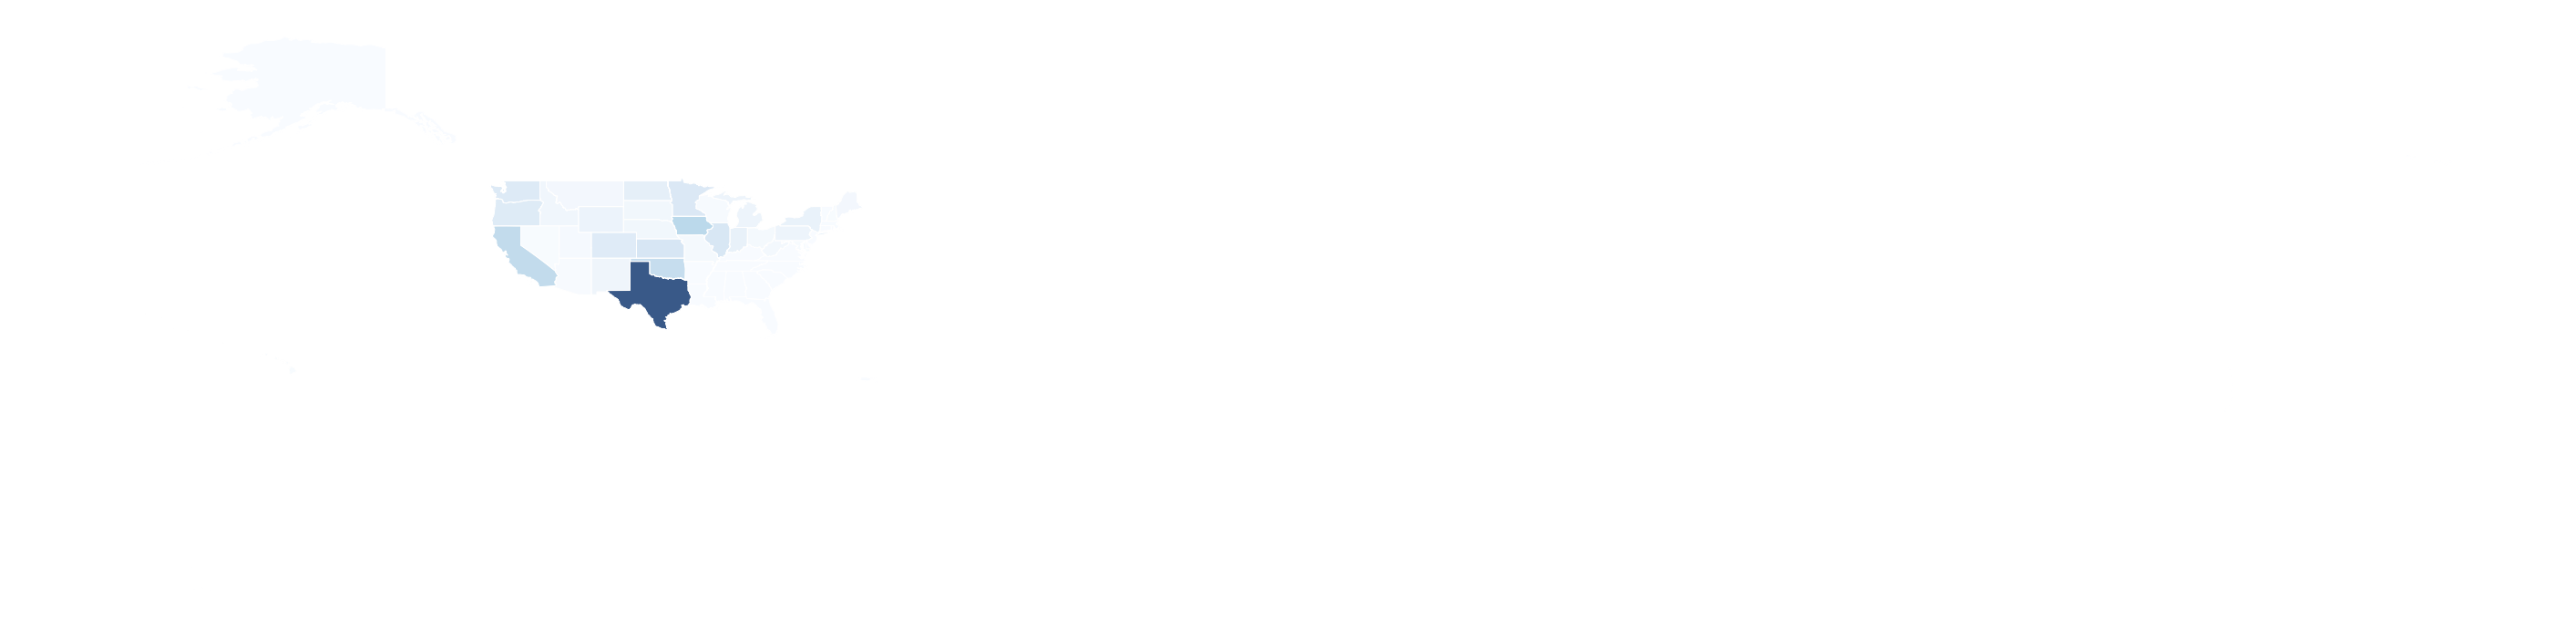

In [40]:
usa_wind.plot(figsize=(50, 30), edgecolor='white', column = 'Wind_MW', alpha = 0.8, cmap = 'Blues').axis('off')

# Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

In [41]:
df_pm25 = pd.read_csv('pm25_annual_fixed.csv')

points_25 = df_pm25.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air_quality = gpd.GeoDataFrame(df_pm25, geometry=points)
air_quality.crs = {'proj': 'latlong'}

air_quality.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.35682299999999 33.458665)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-88.0103 31.0069)


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

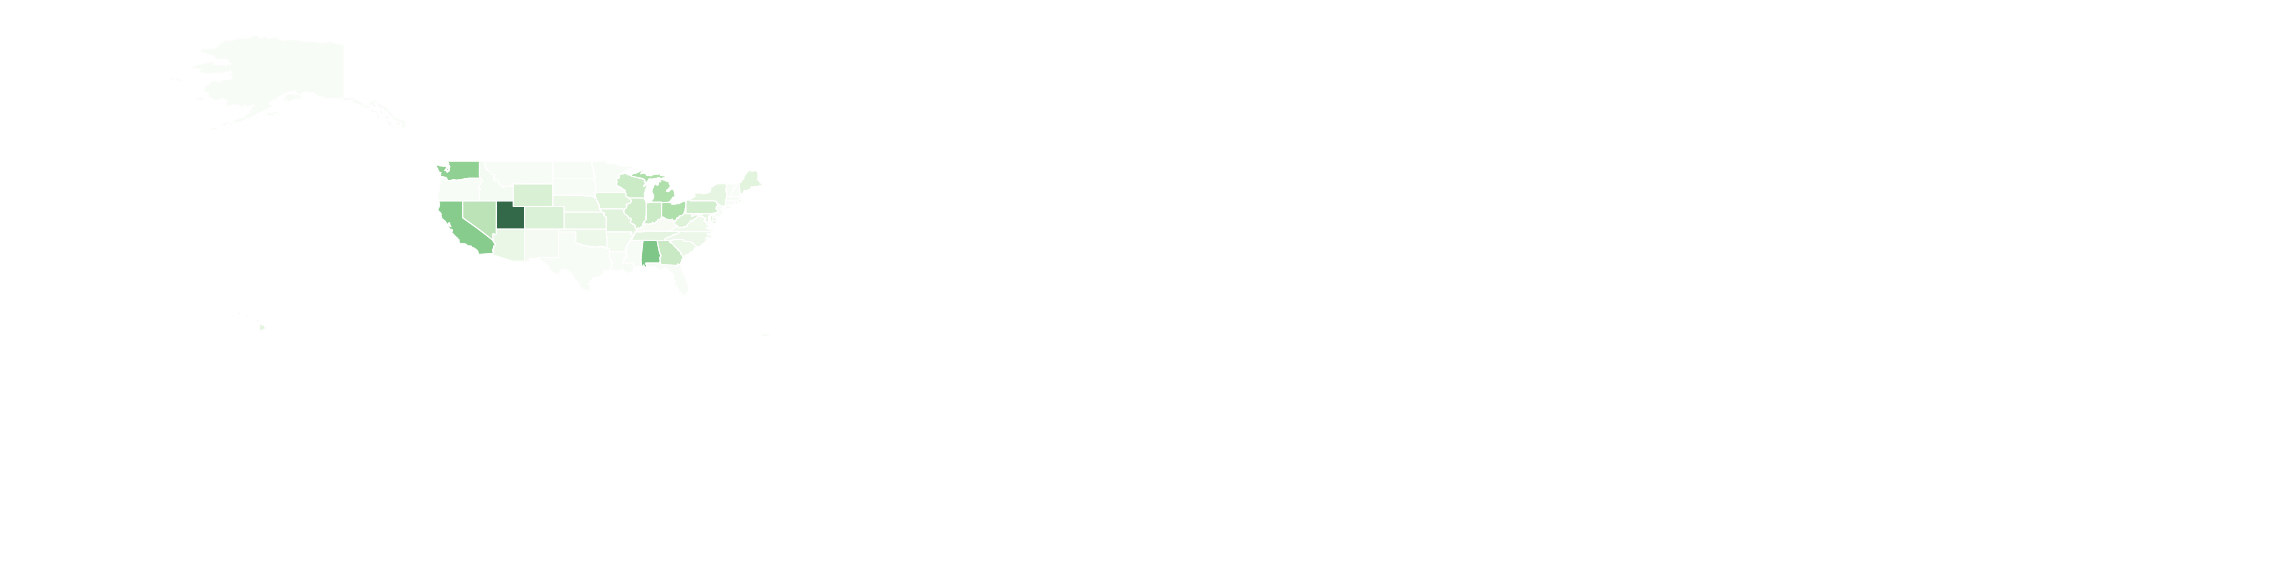

In [42]:
air = air_quality.groupby('State Name')['1st Max Value'].max().reset_index()
usa_air = usa.merge(air, how='left', left_on = 'NAME', right_on = 'State Name')
usa_air.plot(column = '1st Max Value', figsize=(40, 20), edgecolor='white', alpha = 0.8, cmap = 'Greens').axis('off')

## Which power plants are within 75 miles of New York City?

In [74]:
bounds2 = [
            [
              -132.187504,
              50.203275
            ],
            [
              -52.382819,
              50.651202
            ],
            [
              -80.595705,
              23.984998
            ],
            [
              -97.031254,
              24.305802
            ],
            [
              -127.529299,
              26.213359
            ],
            [
              -134.472658,
              37.052985
            ],
        
]


(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

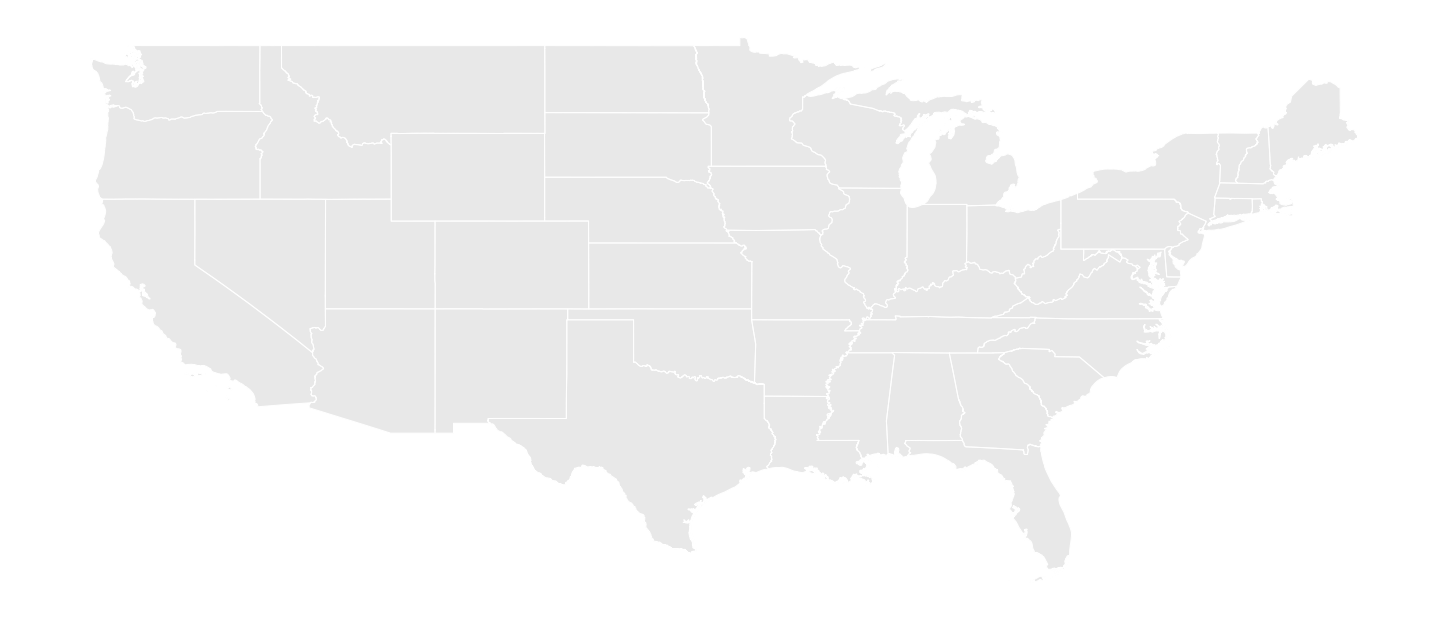

In [162]:
from shapely.geometry import Polygon
us_box = Polygon(bounds2)
continental = usa[usa.to_crs({'proj': 'latlong'}).within(us_box)]
continental.plot(edgecolor= 'white', color = 'lightgrey', figsize = (25,20)).axis('off')

In [102]:
nyc = gpd.GeoDataFrame(geometry=[Point(-74.0, 40.7)])
nyc.crs = {'proj':'latlong'}
nyc_buffer  = nyc.buffer(1.08)

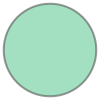

In [94]:
nyc.buffer(1.08).loc[0]

In [96]:
powerplant_nyc = p_state[p_state.within(nyc_buffer.loc[0])]

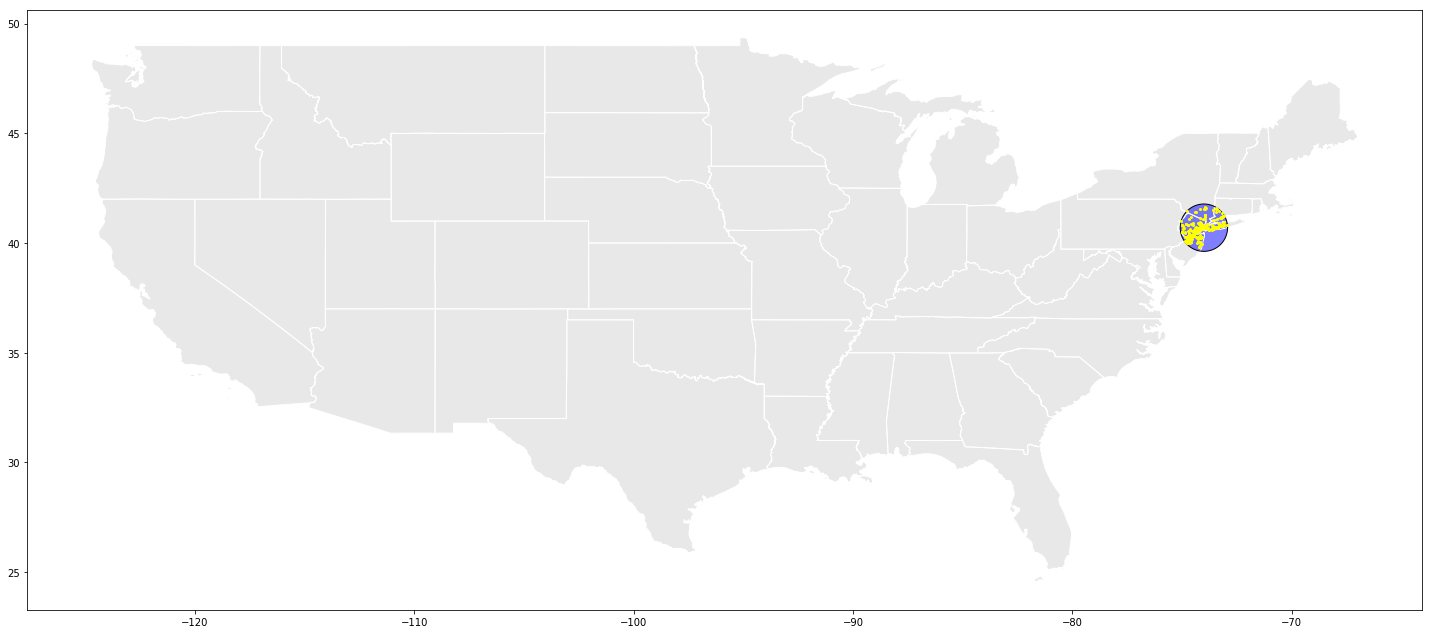

In [101]:
ax = continental.plot(edgecolor= 'white', color = 'lightgrey', figsize = (25,20))
nyc_buffer.plot(ax = ax, color ='blue')
powerplant_nyc.plot(ax = ax, color = 'yellow')

# What is the most popular power source by state?

In [145]:
#'Coal_MW', 'NG_MW', 'Crude_MW', 'Bio_MW', 'Hydro_MW', 'HydroPS_MW',
#'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Geo_MW',
print(p_state.groupby('NAME')['Wind_MW'].sum().sum())
print(p_state.groupby('NAME')['Coal_MW'].sum().sum())
print(p_state.groupby('NAME')['Bio_MW'].sum().sum())
print(p_state.groupby('NAME')['NG_MW'].sum().sum())
print(p_state.groupby('NAME')['Crude_MW'].sum().sum())
print(p_state.groupby('NAME')['Hydro_MW'].sum().sum())
print(p_state.groupby('NAME')['HydroPS_MW'].sum().sum())
print(p_state.groupby('NAME')['Nuclear_MW'].sum().sum())
print(p_state.groupby('NAME')['Solar_MW'].sum().sum())
print(p_state.groupby('NAME')['Geo_MW'].sum().sum())

print('Natural gas is the most popular energy')

74707.3
272421.9
14107.3
447485.9
36382.5
79915.9
22670.1
99794.0
15680.0
2541.5
Natural gas is the most popular energy


## Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

In [151]:
bounds = [
            [
              -80.68359375,
              37.75334401310656
            ],
            [
              -65.91796875,
              37.75334401310656
            ],
            [
              -65.91796875,
              48.37084770238366
            ],
            [
              -80.68359375,
              48.37084770238366
            ],
            [
              -80.68359375,
              37.75334401310656
            ]
]

In [161]:
ny_box = Polygon(bounds)

newyork = usa[usa.to_crs({'proj': 'latlong'}).within(ny_box)]

In [154]:
nyc = gpd.GeoDataFrame(geometry=[Point(-74.0, 40.7)])
nyc.crs = {'proj':'latlong'}
nyc_buffer  = nyc.buffer(2.16)

(-81.198390799999999, -66.271395200000001, 37.434318549999993, 47.93708445)

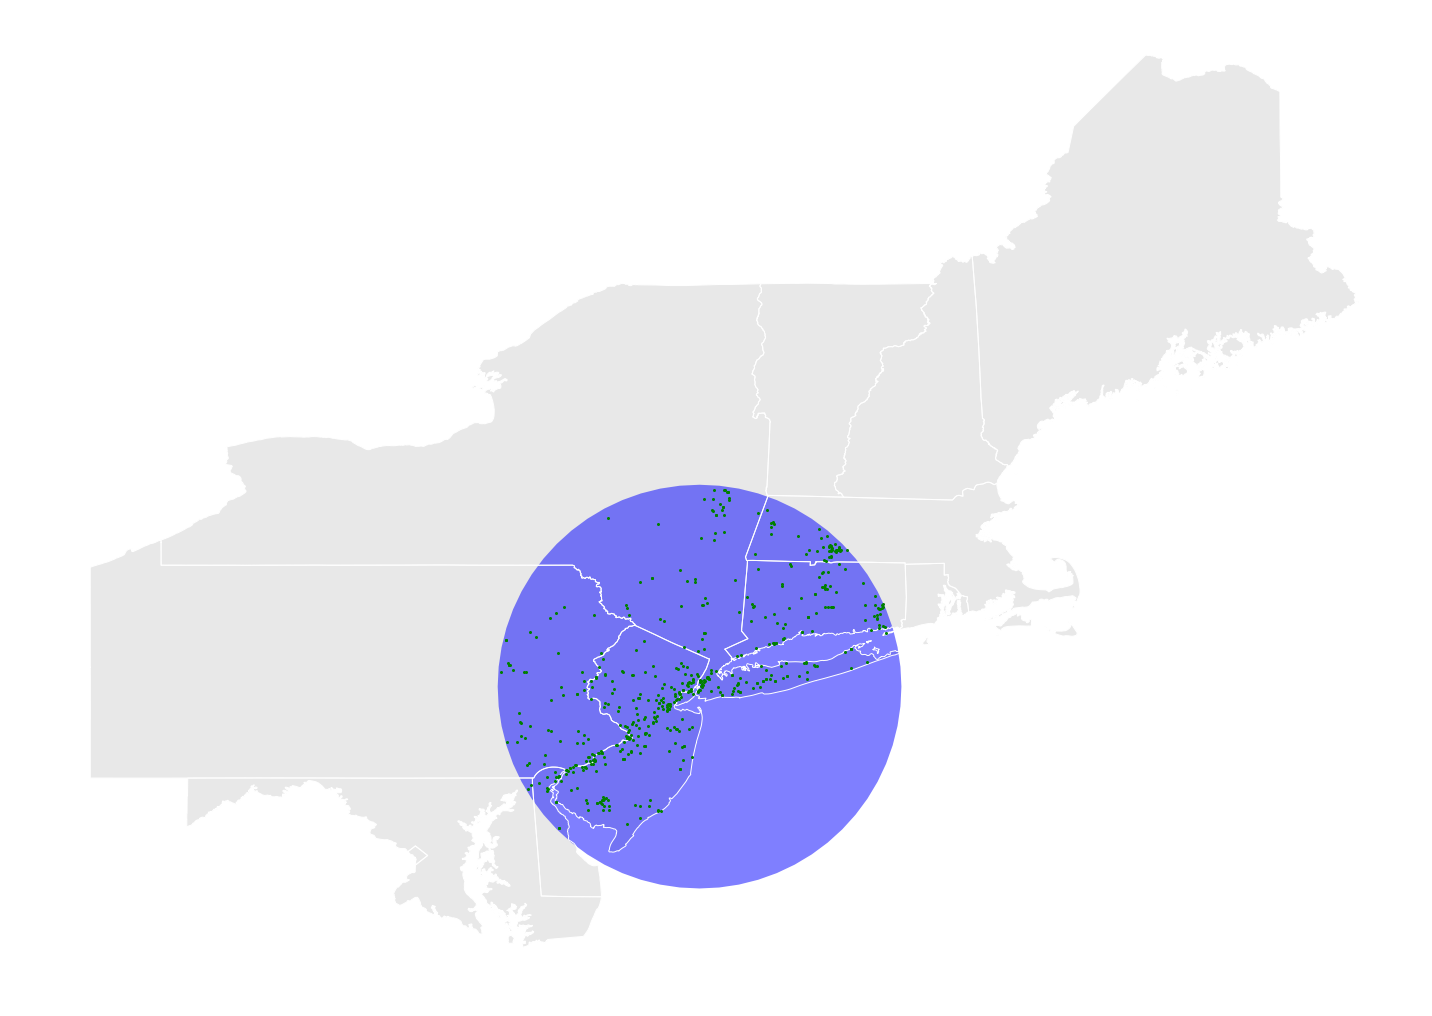

In [160]:
ax = newyork.plot(edgecolor= 'white', color = 'lightgrey', figsize = (25,20),alpha = 0.5)
nyc_buffer.plot(ax = ax, color = 'blue',linewidth= 0)
p_state[p_state.within(nyc_buffer.loc[0])].plot(ax= ax,color= 'green').axis('off')